# Juntando tudo: rascunho

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install plotly --upgrade
!pip install sklearn --upgrade

     |████████████████████████████████| 13.2MB 278kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [3]:
# Dataframe e matemática
import numpy as np
import pandas as pd

# Visualização

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning: Algorítimos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential 
from keras.layers import Dense , Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_predict

# Machine Learning: split, grid search e cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Métricas
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score


In [4]:
pd.options.display.float_format= "{:.2f}".format
pd.options.display.max_colwidth = 5000

In [5]:
!pip install ipython-autotime
%load_ext autotime


time: 137 µs (started: 2021-04-23 19:24:07 +00:00)


In [6]:
#Importando o DataFrame
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Trabalho em grupo/Limpa_G4")
df = df.iloc[:,1:]

# Separando X e y 
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#Separando os dados em teste e treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y,  random_state= 6)

#Separando os dados de treinamento em treinamento (final) e validação

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify = y_train, random_state= 6)

# Calculando as proporções do valor 1 entre os splits
prop_real = df[df["Made Donation in March 2007"] == 1]["Made Donation in March 2007"].count()/df["Made Donation in March 2007"].count()
prop_treino = y_train[y_train == 1].count()/y_train.count()
prop_teste = y_test[y_test == 1].count()/y_test.count()
prop_validação = y_val[y_val == 1].count()/y_val.count()

# Criando um Data Frame para avaliar se a proporção de valor 1 é identica nos datasets.
df_train_test_prop = pd.DataFrame([prop_real,prop_treino,prop_teste, prop_validação]).T
df_train_test_prop.rename(columns = {0:"Proporção Real", 1: "Proporção de Treinamento", 2: "Proporção de Teste", 3: "Proporção de Validação"}, 
                          inplace = True)
df_train_test_prop

,Proporção Real,Proporção de Treinamento,Proporção de Teste,Proporção de Validação
0,0.24,0.24,0.24,0.24


time: 699 ms (started: 2021-04-23 19:24:07 +00:00)


In [7]:
# Normalizando X_train

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

# Normalizando o resto

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

time: 7.37 ms (started: 2021-04-23 19:24:08 +00:00)


## Modelos

In [8]:
# Regressão Logística
LR = LogisticRegression(C = 0.05, 
                        class_weight = "balanced",
                        penalty = "l2",
                        solver = "liblinear",
                        random_state = 6).fit(X_train,y_train)

# Matriz de confusão
y_pred = LR.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)

54 7 32 20
time: 16.4 ms (started: 2021-04-23 19:24:08 +00:00)


In [9]:
# Árvore de Decisão
AD = DecisionTreeClassifier(criterion = "gini", 
                            max_depth = 80, 
                            min_samples_leaf = 1, 
                            min_samples_split = 10,
                            splitter = "random",
                            random_state = 6).fit(X_train, y_train)
# Matriz de confusão
y_pred = AD.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)

75 15 11 12
time: 11.3 ms (started: 2021-04-23 19:24:08 +00:00)


In [10]:
# KNN classificador
KNN = KNeighborsClassifier(n_neighbors=5,
                           algorithm = "brute", 
                           leaf_size = 10,
                           metric = "minkowski",
                           p = 2).fit(X_train, y_train)

# Matriz de confusão
y_pred = KNN.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)

74 17 12 10
time: 20.3 ms (started: 2021-04-23 19:24:08 +00:00)


In [11]:
# Floresta Aleatória
RF = RandomForestClassifier(class_weight = 'balanced', 
                            max_features = "sqrt", 
                            min_samples_leaf = 1,
                            min_samples_split = 10,
                            n_estimators = 650,  
                            random_state = 6).fit(X_train,y_train)

# Matriz de confusão
y_pred = RF.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)

66 10 20 17
time: 1.08 s (started: 2021-04-23 19:24:08 +00:00)


In [12]:
# Ada Booster
CLF = AdaBoostClassifier(algorithm = "SAMME.R",
                         learning_rate = 1,
                         n_estimators = 100,
                         random_state = 6).fit(X_train, y_train)

# Matriz de confusão
y_pred = CLF.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)

84 18 2 9
time: 172 ms (started: 2021-04-23 19:24:09 +00:00)


In [13]:
# SVM
SVC = svm.SVC(C = 1, 
              degree = 3, 
              gamma = "scale", 
              kernel = "sigmoid", 
              random_state = 6).fit(X_train, y_train)

# Matriz de confusão
y_pred = SVC.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn,fp,fn,tp)  

76 15 10 12
time: 17.9 ms (started: 2021-04-23 19:24:09 +00:00)


In [14]:
# RNA
def rede_neural (neuron_1,neuron_2,neuron_3, activation,kernel_initializer,lr):
    classificador = Sequential()
    classificador.add(Dense(units = neuron_1, activation = activation, input_dim = 3))
    classificador.add(Dense(units = neuron_2, activation = activation))
    classificador.add(Dense(units = neuron_3, activation = activation))
    classificador.add(Dense(units= 1 , activation = 'sigmoid'))
    optmizer = Adam(learning_rate = lr)
    classificador.compile(optimizer = optmizer, loss='binary_crossentropy',
                          metrics = ['accuracy'])
    return classificador

RNA = KerasClassifier(build_fn= rede_neural,
                                verbose=0,
                                activation = "relu",
                                epochs = 500,
                                kernel_initializer = "random_uniform",
                                lr = 0.01,
                                neuron_1 = 8,
                                neuron_2 = 8,
                                neuron_3 = 4)

RNA.fit(X_train, y_train)

y_pred = RNA.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_pred,y_test).ravel()
print(tn, fp, fn, tp)

83 17 3 10
time: 7.87 s (started: 2021-04-23 19:24:09 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
del y_pred

time: 986 µs (started: 2021-04-23 19:24:17 +00:00)


## Resultados

In [16]:
# Separando os modelos
Modelos = [LR, AD, RF, CLF, SVC, KNN, RNA]

Nomes_modelos = ["Regessão Logística", "Árvore de Decisão", "Floresta Aleatória", "Ada Booster", "SVM", "KNN", "Rede Neural"]

# Criando um DataFrame para armazenar os resultados
DF_resultados = pd.DataFrame(data = np.zeros((len(Modelos),5)))

DF_resultados.rename(columns = {0: "Acurácia", 1: "Precisão", 2: "Revocação", 3: "F1", 4: "ROC"}, inplace = True)

# Loop de teste dos modelos

for i, modelo in zip(range(len(Nomes_modelos)), Modelos):

    y_pred = modelo.predict(X_test) 

    DF_resultados.iloc[i,0] =  accuracy_score(y_test, y_pred)
    DF_resultados.iloc[i,1] =  precision_score(y_test, y_pred)
    DF_resultados.iloc[i,2] =  recall_score(y_test, y_pred)
    DF_resultados.iloc[i,3] =  f1_score(y_test, y_pred, average = "macro")
    DF_resultados.iloc[i,4] =  roc_auc_score(y_test, y_pred)

    DF_resultados.rename(index = {i: Nomes_modelos[i]}, inplace = True)

DF_resultados

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,Acurácia,Precisão,Revocação,F1,ROC
Regessão Logística,0.65,0.38,0.74,0.62,0.68
Árvore de Decisão,0.77,0.52,0.44,0.67,0.66
Floresta Aleatória,0.73,0.46,0.63,0.67,0.70
Ada Booster,0.82,0.82,0.33,0.68,0.66
SVM,0.78,0.55,0.44,0.67,0.66
KNN,0.74,0.45,0.37,0.62,0.62
Rede Neural,0.82,0.77,0.37,0.70,0.67


time: 193 ms (started: 2021-04-23 19:24:17 +00:00)


# Cross validation

In [31]:
# Destreinando os modelos
LR = LogisticRegression(C = 0.05, 
                        class_weight = "balanced",
                        penalty = "l2",
                        solver = "liblinear",
                        random_state = 6)

AD = DecisionTreeClassifier(criterion = "gini", 
                            max_depth = 80, 
                            min_samples_leaf = 1, 
                            min_samples_split = 10,
                            splitter = "random",
                            random_state = 6)

KNN = KNeighborsClassifier(n_neighbors=5,
                           algorithm = "brute", 
                           leaf_size = 10,
                           metric = "minkowski",
                           p = 2)

RF = RandomForestClassifier(class_weight = 'balanced', 
                            max_features = "sqrt", 
                            min_samples_leaf = 1,
                            min_samples_split = 10,
                            n_estimators = 650,  
                            random_state = 6)

CLF = AdaBoostClassifier(algorithm = "SAMME.R",
                         learning_rate = 1,
                         n_estimators = 100,
                         random_state = 6)

SVC = svm.SVC(C = 1, 
              degree = 3, 
              gamma = "scale", 
              kernel = "sigmoid", 
              probability = True,
              random_state = 6)

def rede_neural (neuron_1,neuron_2,neuron_3, activation,kernel_initializer,lr):
    classificador = Sequential()
    classificador.add(Dense(units = neuron_1, activation = activation, input_dim = 3))
    classificador.add(Dense(units = neuron_2, activation = activation))
    classificador.add(Dense(units = neuron_3, activation = activation))
    classificador.add(Dense(units= 1 , activation = 'sigmoid'))
    optmizer = Adam(learning_rate = lr)
    classificador.compile(optimizer = optmizer, loss='binary_crossentropy',
                          metrics = ['accuracy'])
    return classificador

RNA = KerasClassifier(build_fn= rede_neural,
                                verbose=0,
                                activation = "relu",
                                epochs = 500,
                                kernel_initializer = "random_uniform",
                                lr = 0.01,
                                neuron_1 = 8,
                                neuron_2 = 8,
                                neuron_3 = 4)


time: 26.1 ms (started: 2021-04-23 19:31:11 +00:00)


In [18]:
# Juntando dados de validação e treino
X_concat = np.concatenate([X_train, X_val], axis = 0)
y_concat = np.concatenate([y_train, y_val], axis = 0)

# Realizando a aleatorização
SSP = StratifiedShuffleSplit(n_splits=5, test_size=.15, random_state=6)

time: 3.9 ms (started: 2021-04-23 19:24:17 +00:00)


In [19]:
#Separando as métricas
métricas = ["accuracy", "precision", "recall", "f1_macro", "roc_auc"]
# Separando os modelos

Modelos = [LR, AD, RF, CLF, SVC, KNN, RNA]

Nomes_modelos = ["Regessão Logística", "Árvore de Decisão", "Floresta Aleatória", "Ada Booster", "SVM", "KNN", "Rede Neural"]

# Criando um DataFrame para armazenar os resultados
DF_resultados_cross_validation = {}

time: 8.61 ms (started: 2021-04-23 19:24:17 +00:00)


In [20]:
# Treinando os modelos via cross validation
for modelo, i in zip(Modelos, range(len(Modelos))):
  CRV = cross_validate(modelo,
                    X_concat,
                    y_concat,
                    cv = SSP,
                    scoring = métricas)
  
  #Salvando os resultados em um dicionário:
  DF_resultados_cross_validation[i] = pd.DataFrame(CRV)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-

time: 44.6 s (started: 2021-04-23 19:24:17 +00:00)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [21]:
for métrica, i in zip(métricas, range(7,12)):
  
  # Criando um DataFrame para cada métrica
  DF_resultados_cross_validation[i] = pd.DataFrame(data = np.zeros((7,5)), index = np.arange(0,7)) 
  
  # Adicionando os resultados de cada modelo.
  
  for j in range(len(Modelos)):
    DF_resultados_cross_validation[i].T[j] = DF_resultados_cross_validation[j].iloc[:,i - 5]
  
  # Renomeandon as chaves
  DF_resultados_cross_validation[métrica] =  DF_resultados_cross_validation.pop(i)
  
  # Renomeando os indexes
  DF_resultados_cross_validation[métrica].index = Nomes_modelos






time: 28.8 ms (started: 2021-04-23 19:25:02 +00:00)


In [22]:
DF_resultados_cross_validation

{0:    fit_time  score_time  ...  test_f1_macro  test_roc_auc
 0      0.00        0.00  ...           0.60          0.71
 1      0.00        0.00  ...           0.63          0.76
 2      0.00        0.00  ...           0.69          0.75
 3      0.00        0.00  ...           0.71          0.81
 4      0.00        0.00  ...           0.63          0.72
 
 [5 rows x 7 columns],
 1:    fit_time  score_time  ...  test_f1_macro  test_roc_auc
 0      0.00        0.00  ...           0.61          0.59
 1      0.00        0.00  ...           0.58          0.67
 2      0.00        0.00  ...           0.49          0.53
 3      0.00        0.00  ...           0.49          0.69
 4      0.00        0.00  ...           0.64          0.60
 
 [5 rows x 7 columns],
 2:    fit_time  score_time  ...  test_f1_macro  test_roc_auc
 0      1.03        0.12  ...           0.63          0.68
 1      0.96        0.14  ...           0.71          0.75
 2      0.97        0.12  ...           0.62          0.

time: 101 ms (started: 2021-04-23 19:25:02 +00:00)


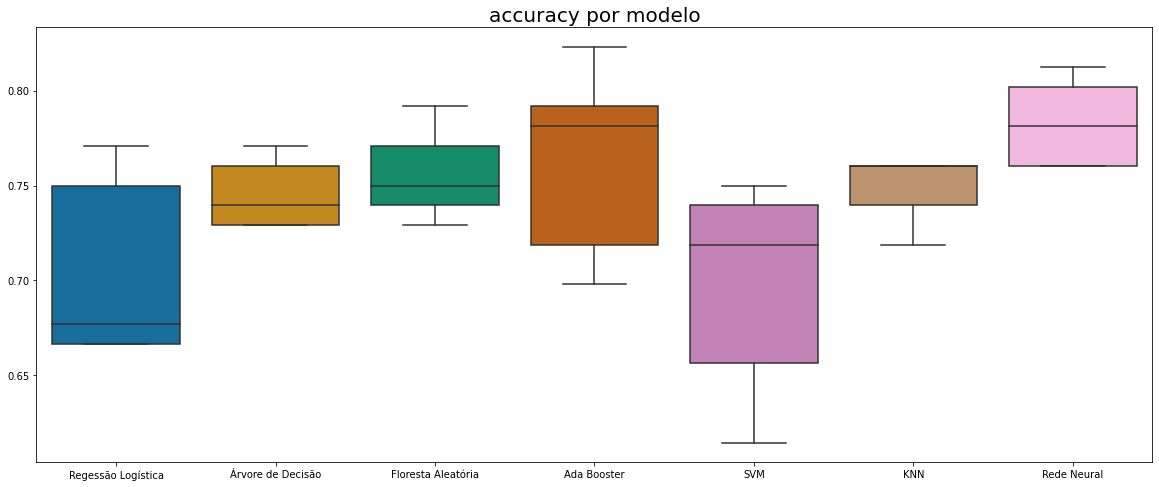

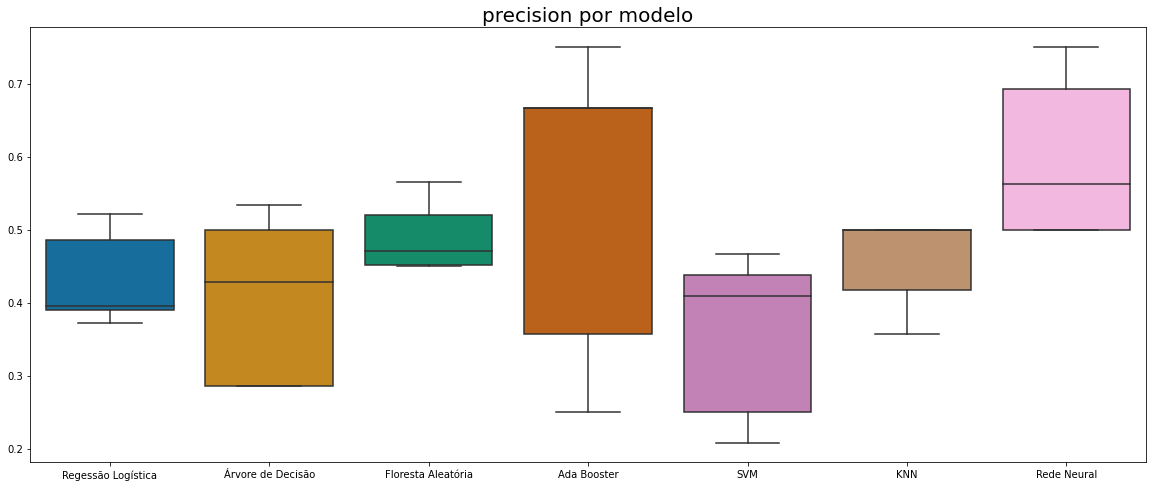

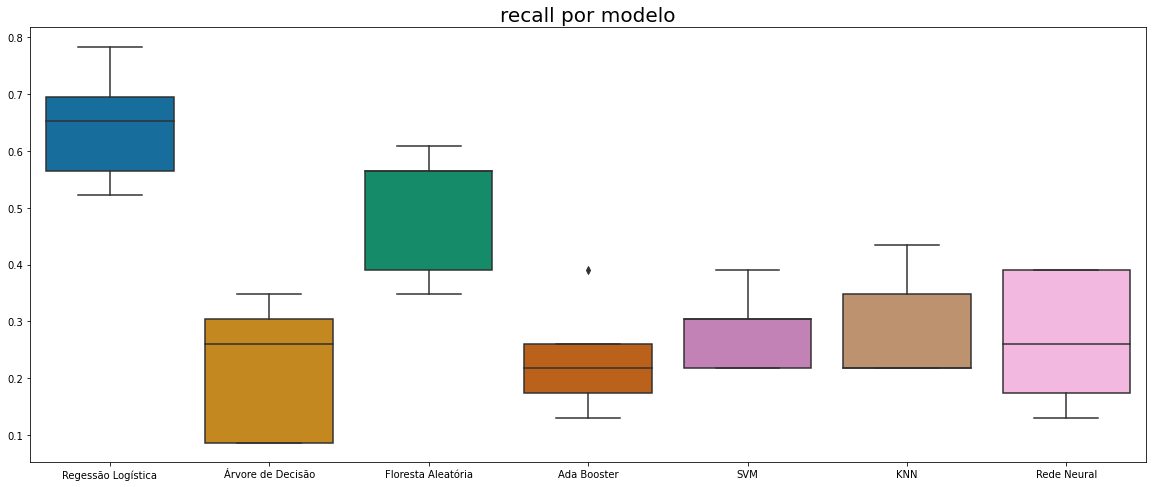

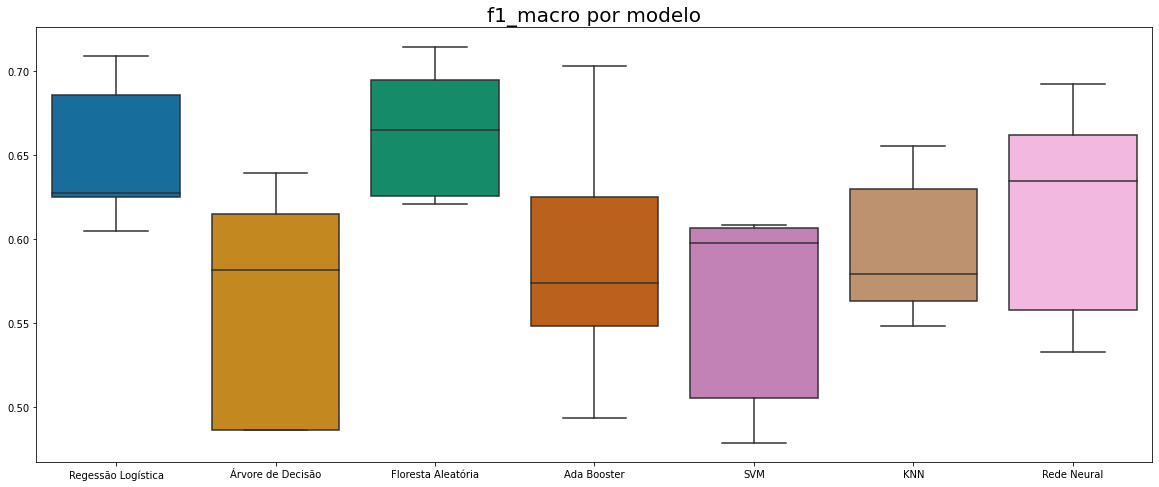

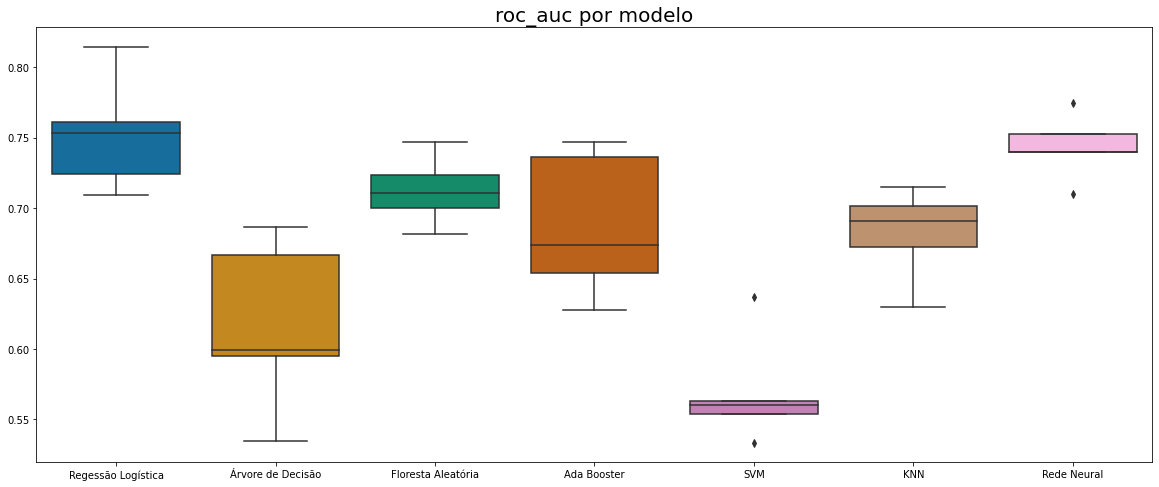



time: 1.42 s (started: 2021-04-23 19:25:02 +00:00)


In [23]:
# Boxlplots
for métrica in métricas: 
  plt.figure(figsize = (20,8))
  sns.boxplot(data = DF_resultados_cross_validation[métrica].T, palette = "colorblind")
  plt.title(f"{métrica} por modelo", fontsize=20)
  plt.show()
  print("\n")

# Verificando limiares

In [24]:
y_concat_pred = pd.DataFrame([y_concat,y_pred]).T.rename(columns = {0: "Y Real", 1: "Y Previsto"})

time: 45.2 ms (started: 2021-04-23 19:25:03 +00:00)


In [25]:
y_prob = cross_val_predict(LR, X_concat, y_concat, method= "predict_proba")
len(y_prob[:,1])

635

time: 29.6 ms (started: 2021-04-23 19:25:04 +00:00)


In [35]:
# Para realizar o cálculo de probabilidades na visualização seguinte, foi necessário remover o SVC

Modelos_n_SVC = [LR, AD, RF, CLF, KNN, RNA]
Nomes_modelos_n_SVC = ['Regessão Logística',
                  'Árvore de Decisão', 
                  'Floresta Aleatória',
                  'Ada Booster',
                  'KNN',
                  'Rede Neural']

time: 3.18 ms (started: 2021-04-23 19:34:29 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

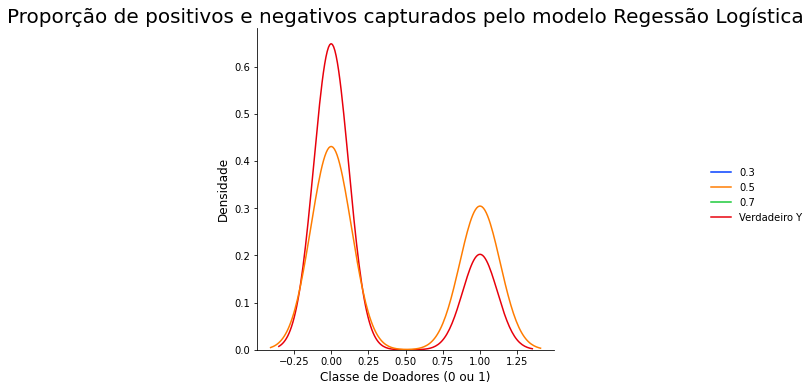

<Figure size 1440x1440 with 0 Axes>

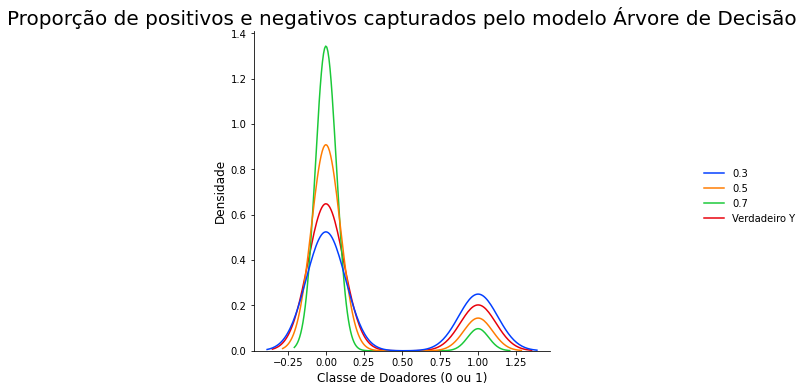

<Figure size 1440x1440 with 0 Axes>

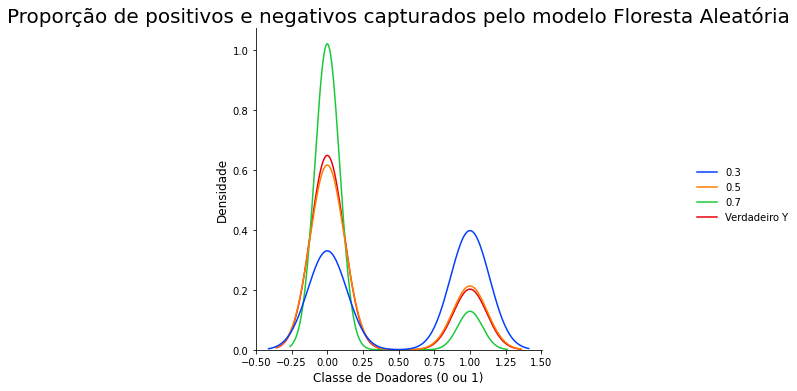

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

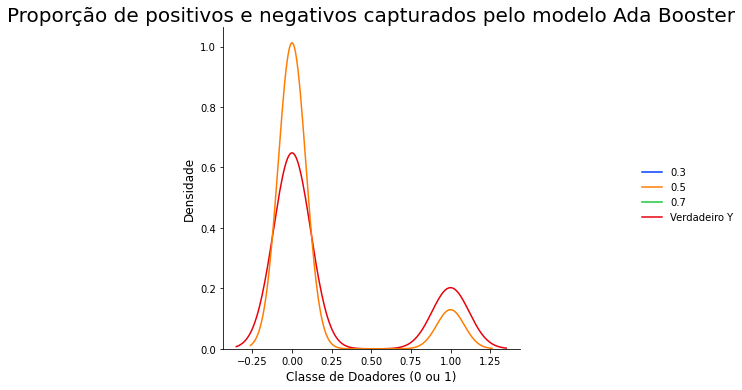

<Figure size 1440x1440 with 0 Axes>

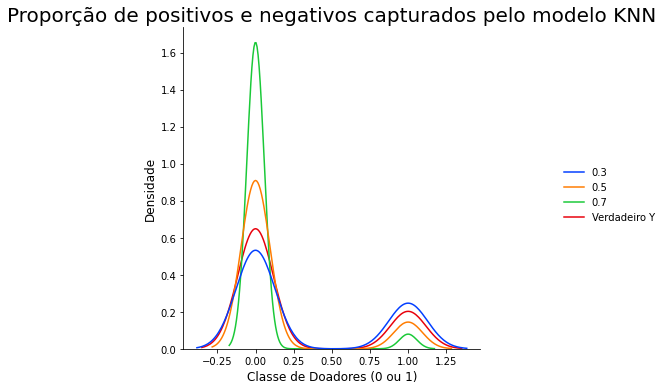

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


<Figure size 1440x1440 with 0 Axes>

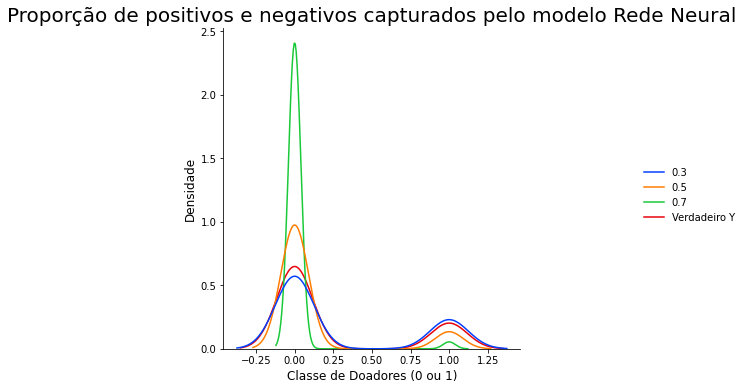



time: 45.4 s (started: 2021-04-23 19:52:37 +00:00)


In [40]:
y_pred = np.zeros((635,3))
K = {}

Data_Frame_Hist = pd.DataFrame(np.zeros((635, 3)), columns = np.arange(0,3))

for nome, modelo in zip(Nomes_modelos_n_SVC, Modelos_n_SVC):
  # Treinando e testando os modelos 
  y_prob = cross_val_predict(modelo, X_concat, y_concat, method= "predict_proba")

  # Calculando as previsões por limiares:
  for i, k in zip([0.3, 0.5, 0.7], range(3)):
    for j in range(635):
      if y_prob[j,1] > i:
        y_pred[j,k] = 1
      else: 
        y_pred[j,k] = 0
  
  # Transformando os valores preditos e reais em um Data Frame:
  y_pred_hist = pd.DataFrame(y_pred, columns = [0.3,0.5,0.7])
  y_pred_hist["Verdadeiro Y"] = y_concat

  # Criando displot
  plt.figure(figsize = (20,20))
  sns.displot(y_pred_hist, palette = "bright", kind="kde")
  plt.title(f"Proporção de positivos e negativos capturados pelo modelo {nome}", fontsize = 20)
  plt.xlabel("Classe de Doadores (0 ou 1)", fontsize = 12)
  plt.ylabel("Densidade", fontsize = 12)
  plt.show()
  print("\n")


Observamos que a floresta aleatória continua sendo o algorítmo que mais se aproxima da distribuição real de (não) doadores, com o divisor padrão de 0.5.
